In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

# Reading the CSV File

In [3]:
df=pd.read_csv("voice.csv")

# How the Dataset Looks Like??

In [4]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [5]:
df.shape

(3168, 21)

In [6]:
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [7]:
# get count of null values in column
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [9]:
a=df.label.value_counts()
print(a)
print("Total: ",df.label.count())

male      1584
female    1584
Name: label, dtype: int64
Total:  3168


# Defining labels 1 for female and 0 for male

In [10]:
df.label=[1 if each == 'female' else 0 for each in df.label]

In [11]:
df.label

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

# Separating the Dependent and Independent variables

In [12]:
y=df.label.values

In [13]:
x=df.drop(['label'],axis='columns')
x = x.values

# Spliting Dataset into train and test data


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
algo_names=[]
algo_scores=[]

In [15]:
x_train.shape

(2534, 20)

# Applying Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(random_state = 50)
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
algo_names.append("Decision Tree")
algo_scores.append(dec_tree.score(x_test,y_test))
p1=dec_tree.predict(x_test)

Decision Tree Classification Score:  0.9511041009463722


# Applying Support Vector Machine Model

In [17]:
from sklearn.svm import SVC
svm=SVC(random_state=50)
svm.fit(x_train,y_train)
print("SVM Classification Score: ",format(svm.score(x_test,y_test)))
algo_names.append("SVM")
algo_scores.append(svm.score(x_test,y_test))
p2=svm.predict(x_test)

SVM Classification Score:  0.6750788643533123


# Applying Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
ran_forest=RandomForestClassifier(random_state=50)
ran_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",ran_forest.score(x_test,y_test))
algo_names.append("Random Forest")
algo_scores.append(ran_forest.score(x_test,y_test))
p3=ran_forest.predict(x_test)

Random Forest Classification Score:  0.973186119873817


Text(0, 0.5, 'Algorithm Score')

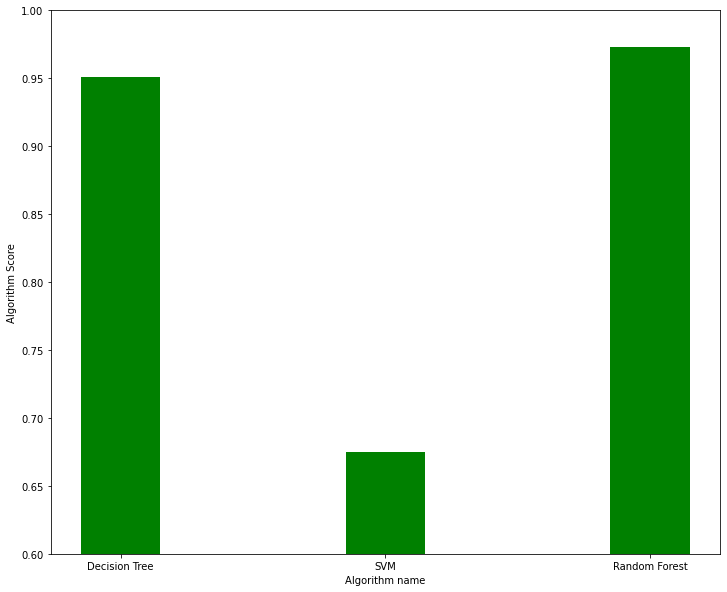

In [19]:
plt.figure(figsize=(12,10))
plt.ylim([0.60,1])
plt.bar(algo_names,algo_scores,width=0.3,color=['green'])
plt.xlabel("Algorithm name")
plt.ylabel("Algorithm Score")

In [20]:
algo_scores

[0.9511041009463722, 0.6750788643533123, 0.973186119873817]

In [21]:
algo_names

['Decision Tree', 'SVM', 'Random Forest']

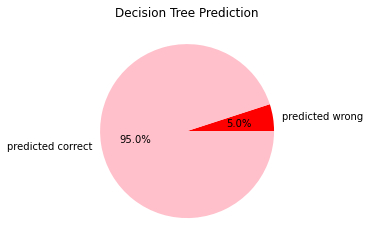

In [22]:
comp1=[31.7,602.3]
l1=['predicted wrong','predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%',colors=['red','pink'])
plt.title('Decision Tree Prediction')
plt.show()

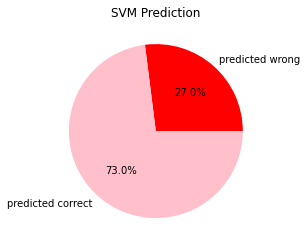

In [23]:
comp2=[171.18,462.82]
l2=['predicted wrong','predicted correct']
plt.pie(comp2,labels=l2,autopct='%0.1f%%',colors=['red','pink'])
plt.title('SVM Prediction')
plt.show()

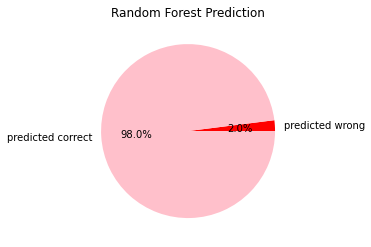

In [24]:
comp3=[12.68,621.32]
l3=['predicted wrong','predicted correct']
plt.pie(comp3,labels=l2,autopct='%0.1f%%',colors=['red','pink'])
plt.title('Random Forest Prediction')
plt.show()

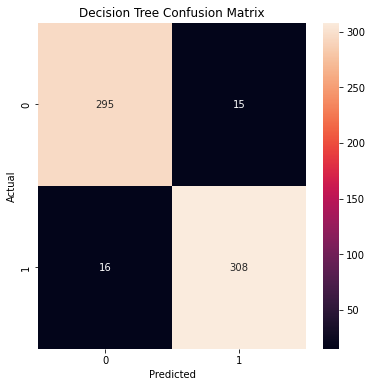

In [25]:
conf_mat1=confusion_matrix(y_test,p1)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt='.0f')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Decision Tree Confusion Matrix")
plt.show()

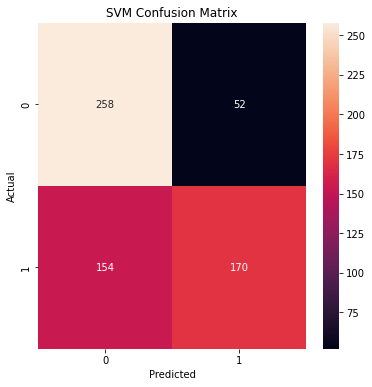

In [26]:
conf_mat2=confusion_matrix(y_test,p2)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat2,annot=True,fmt='.0f')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("SVM Confusion Matrix")
plt.show()

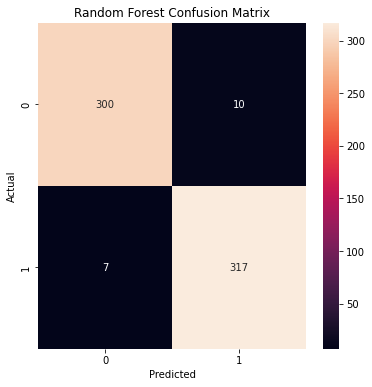

In [28]:
conf_mat3=confusion_matrix(y_test,p3)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat3,annot=True,fmt='.0f')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Random Forest Confusion Matrix")
plt.show()

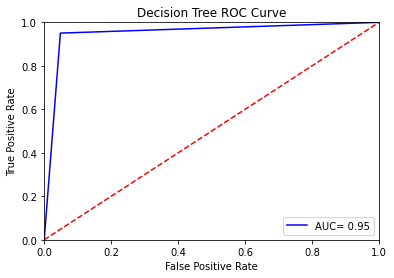

Decision Tree AUC:  0.951115093588212


In [29]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
b=[]
probs1=dec_tree.predict_proba(x_test)
preds1=probs1[:,1]
fpr1,tpr1,threshold1=roc_curve(y_test,preds1)
roc_auc1=auc(fpr1,tpr1)
plt.title("Receiver Operating CHaracteristics")
plt.plot(fpr1,tpr1,'b',label='AUC= %0.2f' % roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Decision Tree ROC Curve")
plt.show()
b.append(roc_auc1)
print("Decision Tree AUC: ",roc_auc_score(y_test,preds1))

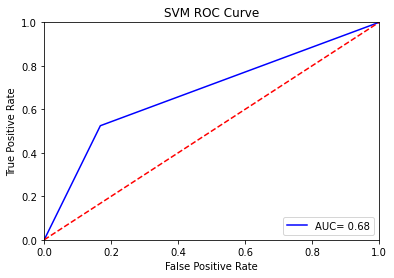

SVM AUC:  0.6784747112704103


In [30]:
fpr2,tpr2,threshold2=roc_curve(y_test,p2)
roc_auc2=auc(fpr2,tpr2)
plt.title("Receiver Operating Characteristics")
plt.plot(fpr2,tpr2,'b',label='AUC= %0.2f' % roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("SVM ROC Curve")
plt.show()
b.append(roc_auc2)
print("SVM AUC: ",roc_auc_score(y_test,p2))

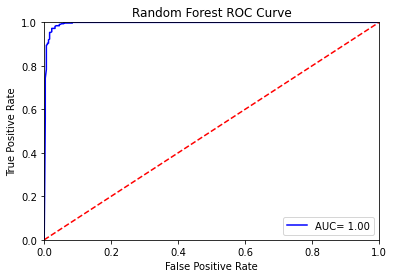

Random Forest AUC:  0.9950766626841895


In [31]:
probs3=ran_forest.predict_proba(x_test)
preds3=probs3[:,1]
fpr3,tpr3,threshold3=roc_curve(y_test,preds3)
roc_auc3=auc(fpr3,tpr3)
plt.title("Receiver Operating Characteristics")
plt.plot(fpr3,tpr3,'b',label='AUC= %0.2f' % roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Random Forest ROC Curve")
plt.show()
b.append(roc_auc3)
print("Random Forest AUC: ",roc_auc_score(y_test,preds3))

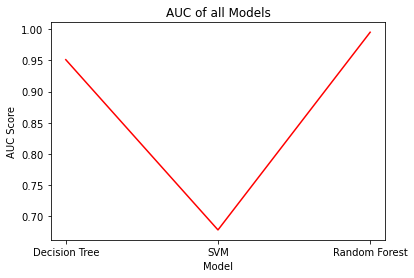

In [32]:
a=["Decision Tree","SVM","Random Forest"]
plt.plot(a,b,color='red')
plt.title('AUC of all Models')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.show()

In [33]:
import random
l=[]
for i in range(0,20):
    n = random.random()
    l.append(n)
arr3=np.array([l])
pred3=ran_forest.predict(arr3)
if pred3[0]==0:
    print("The Given Voice data is of male")
else :
    print("The Given Voice data is of Female")

The Given Voice data is of Female


In [36]:
freq=float(input("Enter mean frequency"))

arr=np.array([[freq,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491916,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000]])
pred=ran_forest.predict(arr)
if pred[0]==0:
    print("The Given Voice data is of male")
else :
    print("The Given Voice data is of Female")

Enter mean frequency0.2134
The Given Voice data is of male
